In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
path = '/content/drive/MyDrive/praktikum/praktikum6/data/diabetes.csv'

In [83]:
df = pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
df['Outcome'].unique()

array([1, 0])

In [86]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [87]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

y = df['Outcome']

In [88]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [89]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
model = SVC(kernel='rbf')

model.fit(X_train, y_train)

SVC()

In [92]:
y_pred = model.predict(X_test)

print(f"Akurasi:  {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi:  76.62%

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154




Confussion Matrix:
 [[87 12]
 [24 31]]


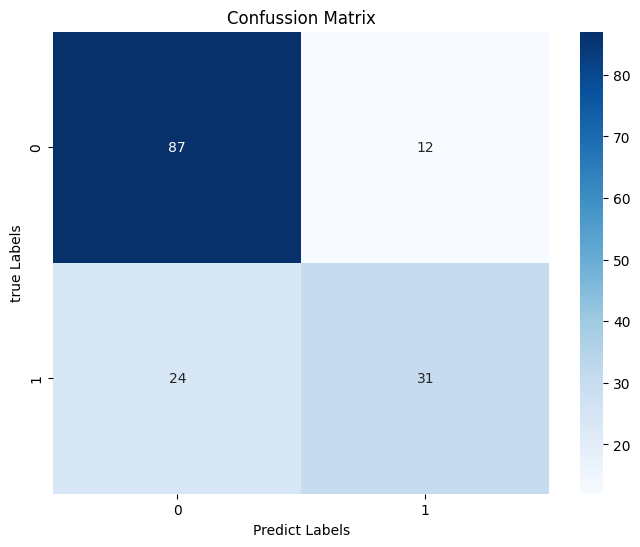

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nConfussion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('Predict Labels')
plt.ylabel('true Labels')
plt.show()

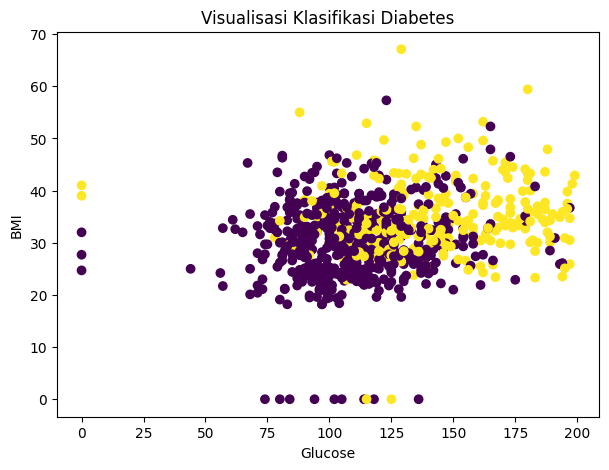

In [94]:
plt.figure(figsize=(7,5))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='viridis')
plt.title('Visualisasi Klasifikasi Diabetes')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

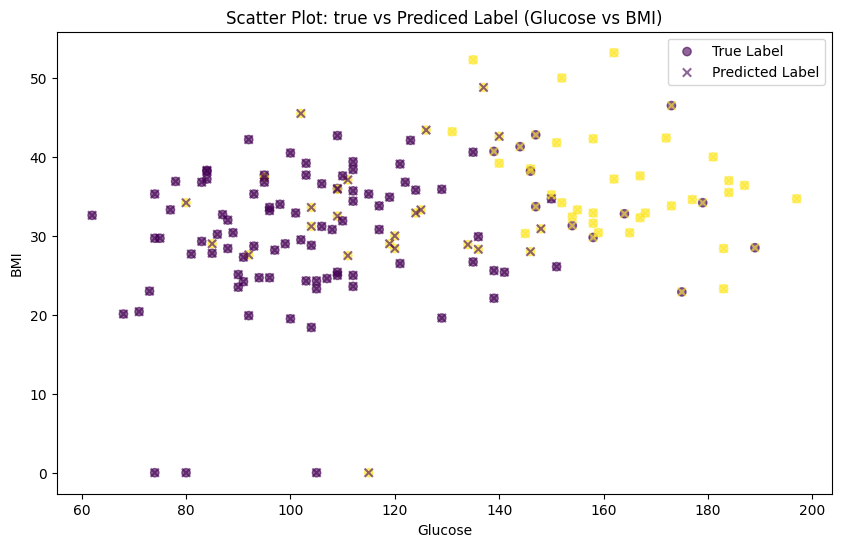

In [95]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(10, 6))

plt.scatter(X_test['Glucose'], X_test['BMI'], c=y_test_encoded, cmap='viridis', marker='o', label='True Label', alpha=0.6)

plt.scatter(X_test['Glucose'], X_test['BMI'], c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Label', alpha=0.6)

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot: true vs Prediced Label (Glucose vs BMI)')
plt.legend()
plt.show()

In [98]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# buat figure 3D dua kolom
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'scene'}, {'type':'scene'}]],
                    subplot_titles=('Label Asli', 'Label Prediksi'))

# plot 1: Label Asli
fig.add_trace(
    go.Scatter3d(
        x=df['Glucose'],
        y=df['BMI'],
        z=df['Age'],
        mode='markers',
        marker=dict(size=4, color=df['Outcome'], colorscale='Viridis'),
        name='Asli'
    ),
    row=1, col=1
)

# plot 2: Label Prediksi
fig.add_trace(
    go.Scatter3d(
        x=X_test['Glucose'],
        y=X_test['BMI'],
        z=X_test['Age'],
        mode='markers',
        marker=dict(size=4, color=y_pred, colorscale='Viridis'),
        name='Prediksi'
    ),
    row=1, col=2
)

fig.update_layout(
    title='Perbandingan Label Asli vs Prediksi (SVM)',
    showlegend=False,
    height=600,
    width=1200
)

fig.show()
